# DYNR1cv - Decision Trees.

Prepared by: *Aleksej Gaj* ([email](mailto:aleksejalex@gmail.com))

## Decision tree
 - non-parametric supervised learning algorithm
 - used both for classification and regression tasks
 - consists of:
     - **nodes** that represent features
     - **branches** that represent decision rules
     - **leaf nodes** that represent outcomes
 - **inputs** are usually given by tuple (where each element is an atrbute used for classification)
 - **criteria:** "best split" and homogenity

Example:
![https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/ce/ed/ICLH_Diagram_Batch_03_24A-AI-ML-DecisionTree.png](https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/ce/ed/ICLH_Diagram_Batch_03_24A-AI-ML-DecisionTree.png)

 - employs a 'divide and conquer' strategy by performing a greedy search to identify the optimal split points within a tree

 - the process is repeated in a top-down recursive manner


 - somewhat similiar to Galton's machine

![https://aleksejgaj.cz/imgsbin/dynr/galton_machine.png](https://aleksejgaj.cz/imgsbin/dynr/galton_machine.png)

 - training phase: train data adjust weights
 - inference

Example from AIMA:
![example form AIMA](https://raw.githubusercontent.com/aimacode/aima-python/61d695b37c6895902081da1f37baf645b0d2658a/images/decisiontree_fruit.jpg)

## Intermezzo: Gini Impurity Formula
The Gini impurity $ G $ is one of criteria used for training decision trees. $G$ for a dataset can be calculated using the formula:

$$G = \sum_{i=1}^{C} p_i (1-p_i) = 1 - \sum_{i=1}^{C} p_i^2$$

where:
- $ C $ is the number of classes (or labels)
- $ p_i $ is the proportion of items in class $ i $ in the dataset.

**Meaning:** how often a randomly chosen element would be misclassified.

### Example
Let's say we have a dataset of 10 items with the following class distribution:

- 4 items are Class A
- 4 items are Class B
- 2 items are Class C

**Step 1:** First, we calculate the proportions of each class:

- $ p_A = \frac{4}{10} = 0.4 $
- $ p_B = \frac{4}{10} = 0.4 $
- $ p_C = \frac{2}{10} = 0.2 $

**Step 2:** Plug these proportions into the Gini impurity formula:

$$G = 1 - (p_A^2 + p_B^2 + p_C^2) = 1- (0.16 + 0.16 + 0.04) = 1-0.36=0.64$$

### Interpretation

A Gini impurity of 0.64 indicates that there is a moderate level of impurity in the dataset, meaning that if you randomly picked an item, there is a 64% chance it would be incorrectly labeled if you assigned a label based on the distribution of classes.

### Using Gini Impurity in Splits

When building a decision tree, we evaluate different potential splits in the data. For each split, we calculate the Gini impurity for the resulting child nodes. The goal is to choose the split that results in the lowest Gini impurity for those child nodes, indicating that they are more homogeneous in terms of class labels.

### Other criteria:
 - entropy
 - information gain
 - mean squared error (for regression)
 - ...

## The algorithm (briefly)
1. **Start with all the data** in the root node.

2. **Choose the best feature** to split the data based on a criterion:

3. **Split the dataset** into two or more groups based on the chosen feature's values.

4. **Repeat the process** for each subgroup, selecting the best feature at each step.

5. **Stop when** a stopping criterion is met (e.g., max depth is reached, all samples in a node belong to the same class, or no significant improvement is possible).

6. **Assign a final label** to each leaf node: (classification - use the majority class, regression - use the average value)


## **Entropy**
Entropy measures the impurity or uncertainty in a dataset. It is defined as:

$$H(S) = -\sum_{i=1}^{c} p_i \log_2 p_i $$

where:
- $ H(S) $ = entropy of the dataset $ S $
- $c$ = number of classes
- $p_i$ = proportion of samples belonging to class $i$

## **Information Gain**
Information Gain (IG) quantifies the reduction in entropy after splitting the dataset on a particular feature. It is defined as:

$$
IG(S, A) = H(S) - \sum_{v \in \text{values}(A)} \frac{|S_v|}{|S|} H(S_v)
$$

where:
- $ IG(S, A) $ = information gain from splitting $ S $ on attribute $ A $
- $ H(S) $ = entropy of the original dataset
- $ v $ = a possible value of attribute $ A $
- $ S_v $ = subset of $ S $ where $ A = v $
- $ |S_v| / |S| $ = proportion of samples in subset $ S_v $
- $ H(S_v) $ = entropy of subset $ S_v $

A higher **information gain** indicates a better split for the decision tree.


## Some use cases

- **Customer Segmentation**: Segmenting customers based on behavior and preferences.
- **Credit Scoring**: Assessing the creditworthiness of applicants.
- **Medical Diagnosis**: Assisting in diagnosing diseases based on symptoms.
- **Fraud Detection**: Identifying fraudulent transactions in financial data.


## Pros:

 - simple and **intuitive** interpretation
 - does **not require special preprocessing** (like normalisation, adding new variables, removing uncomplete data)
 - works for **both numerical and categorical** variables
 - **"white box"** (= whatever happens can be explained via Boolean logic, cf. "black box" models)
 - works even if some assumptions are violated
 - 

## Cons:
 - obtaining optimal tree is **NP-complete task** (NP-complete = task can be reuced to NP task in polyn. time, for ex. TSP; NP = {nondeterm. polynomial} = for given result correctness can be verified in polyn. time; P = task can be solved in polynomial time on Turing machine)
 - can be **easily overfitted** (structure bagins to be too compex for current dataset/task)
 - for **categorical variables: sensitivity** to absolute number of representants for each value (ex. 100 men vs 1 woman)

## Bayes Net, Neural net, Decision tree - what's the difference?

Nice comment was found [here](https://stats.stackexchange.com/questions/94511/difference-between-bayes-network-neural-network-decision-tree-and-petri-nets):

> Wow, what a big question! The short version of the answer is that just because you can represent two models using diagrammatically similar visual representations, doesn't mean they are even remotely related structurally, functionally, or philosophically. I'm not familiar with FCM or NF, but I can speak to the other ones a bit.
> 
> **Bayesian Network**
> 
> In a Bayesian network, the graph represents the conditional dependencies of different variables in the model. Each node represents a variable, and each directed edge represents a conditional relationship. Essentially, the graphical model is a visualization of the chain rule.
> 
> **Neural Network**
> 
> In a neural network, each node is a simulated "neuron". The neuron is essentially on or off, and its activation is determined by a linear combination of the values of each output in the preceding "layer" of the network.
> 
> **Decision Tree**
> 
> Let's say we are using a decision tree for classification. The tree essentially provides us with a flowchart describing how we should classify an observation. We start at the root of the tree, and the leaf where we end up determines the classification we predict.
> 
> As you can see, these three models really *have basically nothing at all to do with each other besides being representable with boxes and arrows*.

## Simple use (`scikit-learn` and famous "ML" flowers)

In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target species

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(max_leaf_nodes=50)

In [5]:
clf

DecisionTreeClassifier(max_leaf_nodes=50)

In [6]:
# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=50)

In [7]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [8]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [9]:
sample_id = 4
X_test_sample = X_test[sample_id].reshape(1,-1)
y_test_sample = y_test[sample_id]
print(f"X_test_sample = {X_test_sample} which is y_test_sample = {y_test_sample}.")

X_test_sample = [[6.8 2.8 4.8 1.4]] which is y_test_sample = 1.


In [10]:
clf.predict(X_test_sample)

array([1])

In [11]:
from sklearn import tree

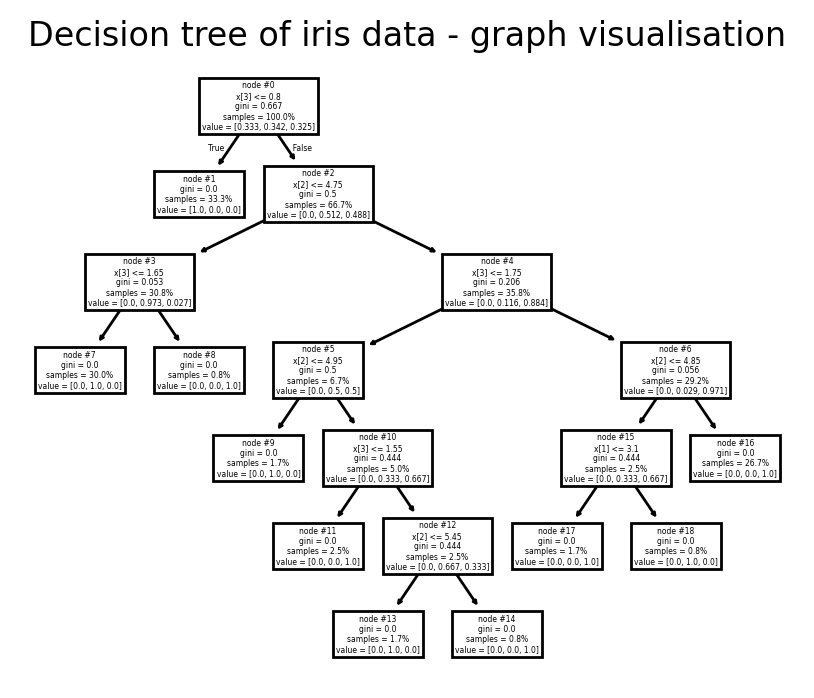

In [12]:
plt.figure(figsize=(5,4), dpi=200)
tree.plot_tree(clf, proportion=True, node_ids=True)
plt.title(f"Decision tree of iris data - graph visualisation")
plt.show()

What can be seen here? 
 - graph visualises trained tree - how algortihm decides on which type of iris it is
 - each "deciding" block (a block having 2 arrows coming out of it) contains "decision rule" like `x[3]<=0.8`
 - each terminal block ends in conclusion (ex. `value = [0, 0, 1]` )

In [13]:
clf.feature_importances_

array([0.        , 0.01667014, 0.40593501, 0.57739485])

In [14]:
clf.criterion

'gini'

In [27]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Load the Iris dataset
#iris = load_iris()
#X = iris.data  # Features
#y = iris.target  # Target species

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the decision tree classifier
clf = DecisionTreeClassifier()

# Fit the model
clf.fit(X_train, y_train)

# Check feature importances
print("Feature importances:", clf.feature_importances_)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [None, 1, 2, 3, 4, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_clf = grid_search.best_estimator_
print(f"Best depth = {best_clf.get_depth()},\n min samples split = {best_clf.min_samples_split},\n min leaf = {best_clf.min_samples_split}\n")

# Check feature importances of the best model
print("Best model feature importances:", best_clf.feature_importances_)


Feature importances: [0.03334028 0.         0.38926487 0.57739485]
Best depth = 4,
 min samples split = 2,
 min leaf = 2

Best model feature importances: [0.00601411 0.         0.4153927  0.5785932 ]


...so best decision tree looks like this:

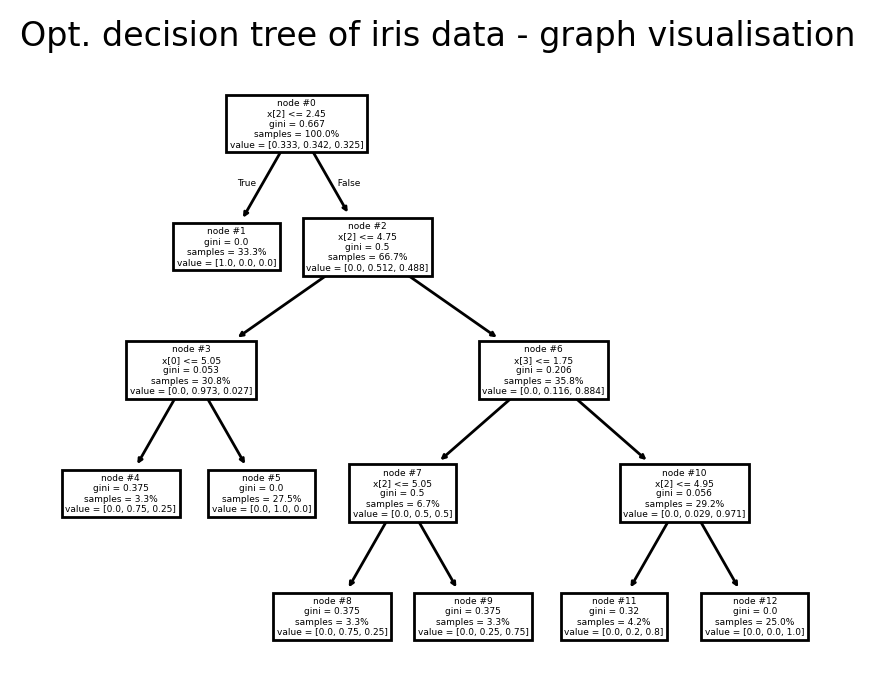

In [19]:
plt.figure(figsize=(5,4), dpi=200)
tree.plot_tree(best_clf, proportion=True, node_ids=True)
plt.title(f"Opt. decision tree of iris data - graph visualisation")
plt.show()

In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
# Convert to DataFrame for better readability
feature_names = iris.feature_names
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = feature_names
vif_data["VIF"] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]

vif_data

,Feature,VIF
0,sepal length (cm),265.165378
1,sepal width (cm),95.558473
2,petal length (cm),183.153101
3,petal width (cm),58.219591


## Sources (useful ones):
 - [IBM website](https://www.ibm.com/think/topics/decision-trees)
 - [inspiring Stack Exchange Q&A](https://stats.stackexchange.com/questions/94511/difference-between-bayes-network-neural-network-decision-tree-and-petri-nets)
 - [Scikit-learn tutorials](https://scikit-learn.org/1.6/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py)
 - 